[View in Colaboratory](https://colab.research.google.com/github/zliu8/What-is-the-True-Normal-Human-Body-Temperature-/blob/master/sliderule_dsi_inferential_statistics_exercise_1_r02.ipynb)

# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [0]:
import pandas as pd

df = pd.read_csv('human_body_temperature.csv')

In [0]:
import numpy as np
from scipy import stats
from scipy.stats import norm

In [0]:
import matplotlib.pyplot as plt

In [0]:
from collections import Counter
import matplotlib.mlab as mlab

## **1. Check Normality of 'Temperature'**

In [0]:
mean=np.mean(df['temperature'])
print(mean)

98.24923076923075


In [0]:
std=np.std(df['temperature'])

In [0]:
samples= np.random.normal(mean,std,size=10000)

In [0]:
median= np.median(df['temperature'])
print(median)

98.3


In [0]:
data=Counter(df['temperature'])
data.most_common(1)

[(98.0, 11)]

The above shows that observations of "temperatures" are normally distributed

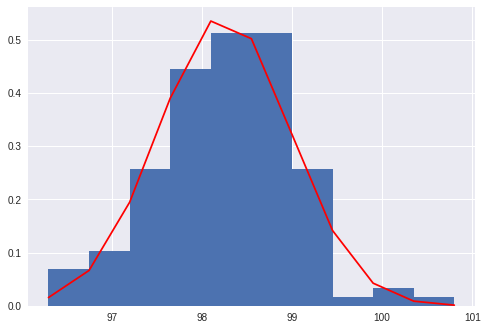

In [11]:
n,bins,patches=plt.hist(df.temperature, 10, normed=1)
mu = np.mean(df.temperature)
sigma = np.std(df.temperature)
plt.plot(bins, mlab.normpdf(bins, mu, sigma),color='r')
plt.show()

## **2. Check whether the sample size is large and the observations are independent**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


There are 130 observations for the 3 variables in the data, the sample size, which is bigger than the sample size 30 in the Central Limit Theorem. 

In terms of the observations, since each observation represents one distinct individual, so the observations are independent.

## **3. Is the true population mean really 98.6 degrees F?**

In [0]:
######The Null hypothesis is that the mean equals to 98.6, the Alternative hypothesis is that mean does not equal to 98.6

In [0]:
sqrt=np.sqrt(130)
SE=std/sqrt
test_mean=98.6
Z=((mean - test_mean) / SE)
print(Z)

-5.4759252020785585


In [0]:
stats.ttest_1samp(df.temperature, test_mean)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [0]:
#####since the result is significant, the we reject the null hypothesis. So population mean is not 98.6.

## **4. Draw a small sample of size 10 from the data and repeat both frequentist tests.**

In [0]:
Sample_new=df.sample(n=10)
Sample_new.head()


,temperature,gender,heart_rate
81,98.0,M,67.0
121,97.9,F,68.0
111,98.0,F,89.0
94,97.8,M,58.0
36,99.1,M,71.0


In [0]:
std_sample=np.std(Sample_new['temperature'])
mean_sample=np.mean(Sample_new['temperature'])
print(std_sample)
print(mean_sample)

0.3638681079732042
98.16


In [0]:
sample_sqrt=np.sqrt(10)
sample_SE=std_sample/sample_sqrt
test_mean=98.6
Z_sample=((mean_sample - test_mean) / sample_SE)
print(Z_sample)

-3.82391899698048


In [0]:
stats.ttest_1samp(Sample_new.temperature, test_mean)

Ttest_1sampResult(statistic=-3.627688085533454, pvalue=0.005505409616664572)

The p-value shows the hypothesis test is statistically significant, 
we reject the null hypothesis. So population mean is not 98.6.

Since the result is significant, the we reject the null hypothesis. So population mean is not 98.6. Again, since each observation represents one distinct individual, so the observations are independent.


## **5. At what temperature should we consider someone's temperature to be "abnormal"?**


In [0]:
def bootstrap_replicate_1d(data, func):
     bs_sample=np.random.choice(data,size=len(data))
     return func(bs_sample)

#####many bootstrap replicates
bs_replicates=np.empty(10000)
for i in range(10000):
     bs_replicates[i]=bootstrap_replicate_1d(df.temperature, np.mean)


In [0]:
conf_int=np.percentile(bs_replicates, [2.5,97.5])
print(conf_int)

[98.12461538 98.37153846]


Any temperature falls outside the confidence interval is abnormal. Given the CI, it is abnormal if one's temperature is lower than98.125 and higher than 98.372.

## **6. Is there a significant difference between males and females in normal temperature?**

In [0]:
F= df[df.gender=='F']
M= df[df.gender=='M']
F.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 129
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [0]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 128
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [0]:
diff_of_means=np.mean(F.temperature)-np.mean(M.temperature)
print(diff_of_means)

0.2892307692307696


In [0]:
from scipy.stats import ttest_ind
ttest_ind(F.temperature, M.temperature)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)

The independent t-test result shows that there is a statistically significant difference in the temperature for females and males.

Another way to look at this question is to calculate the confidence interval.

In [0]:
df=65+65-2
print(df)


128


In [0]:
from scipy.stats import t
t_val=t.ppf([0.975], 128)
print(t_val)

[1.97867085]


In [0]:
from math import sqrt
N1 = 65
N2 = 65
std1 = F.temperature.std()
std2 = M.temperature.std()
std_N1N2 = sqrt(((N1 - 1)*(std1)**2 + (N2 - 1)*(std2)**2) / 128) 

In [0]:
MoE=t.ppf(0.975,128) * std_N1N2 * sqrt(1/N1 + 1/N2)
print(MoE)

0.25040861262481573


In [0]:
print ('\nThe difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_of_means, diff_of_means - MoE, diff_of_means + MoE))


The difference between groups is 0.3 [0.0 to 0.5] (mean [95% CI])


The result above shows that we can be 95% certain that the true difference in means between the temperature of females and males falls between 0 to 0.5. The current difference 0.3 is in this range, so there is a statistically significant difference in the temperature for females and males.